# <center> Раздел 2. Модуль 5. Визуализация данных

In [1]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## <center> Графические возможности библиотеки matplotlib

Matplotlib - это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

In [2]:
%pip install matplotlib;

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


За визуализацию графиков в matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. К тому же для более корректного отображения графиков в Jupiter используется команда %matplotlib inline

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Примечание. Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

In [4]:
plt.style.use('default')

Библиотека позволяет работать в нескольких режимах. Самый распространенный и мощный по функционалу - объектно-ориентированный режим. Он основан на работе с объектами фигур (figure), их еще называют канвасами или холстами, и координатных плоскостей (axes) или системы координат. 

![](https://lms.skillfactory.ru/assets/courseware/v1/d0c246229439d37c308aa7aed48a28e2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-u1-md13_5_1.png)

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

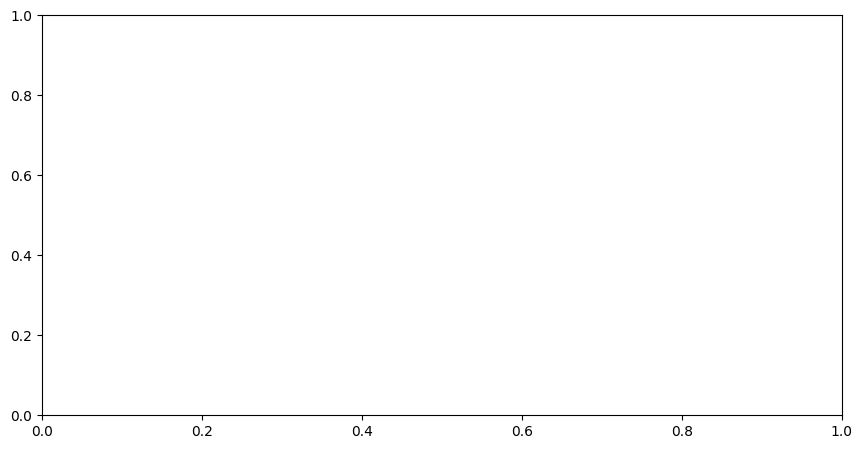

In [5]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод **scatter().**

                                                 Основные параметры метода scatter()

 - x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
 - s — размер маркеров;
 - marker — вид маркеров ('o' — точки, '^' — треугольники);
 - c — цвет маркеров.

На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

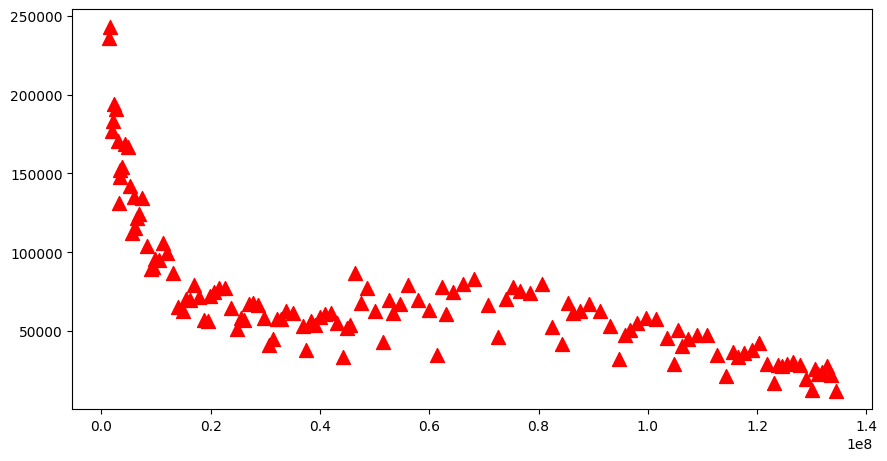

In [6]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='^',
    c = 'red'
);

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.
_________________________________________

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

*Примечание. Обратите внимание, что под «распространённостью» вакцины здесь подразумевается не количество введённых доз (таких данных у нас в таблице нет), а количество стран, в которых она используется. При этом подсчёт ведётся не по каждой отдельной вакцине, а по их комбинациям, и одна и та же вакцина учитывается несколько раз в сочетаниях с другими.*

Для построения круговых диаграмм в Matplotlib используется метод **pie()**.

                                       Основные параметры метода pie()

 - x — значения, по которым будет строиться круговая диаграмма;
 - labels — метки, соответствующие значениям;
 - autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
 - explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

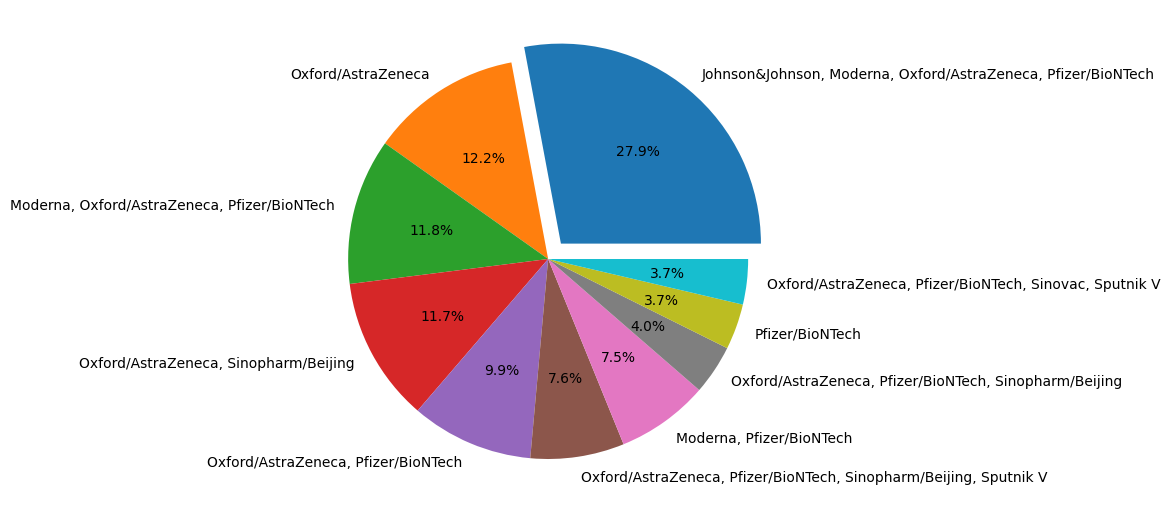

In [7]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.
_____________________________________________
Примечание (для внимательных и любознательных)

Обратите внимание, что диаграмма показывает соотношение только для десяти популярных комбинаций вакцин, а не для всех вакцин в совокупности, что является не совсем корректным для круговой диаграммы, так как она должна отображать единое целое. </br>
К тому же наша круговая диаграмма считает количество использований каждой комбинации в таблице, а не количество стран, в которых используется эта комбинация, что также является некорректным.</br>
→ Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.</br>
Однако для этого нам необходимо будет совершить несколько довольно сложных преобразований:</br>
   1) Для начала нам необходимо избавиться от пропусков в столбце с вакцинами. Сделаем это с помощью метода dropna(), который удаляет строки, содержащие пропуски в столбце, указанном в параметре **subset()**.*Данный метод мы будем изучать в следующем модуле, посвящённом очистке данных — пока что не вам не стоит заострять на нём внимание:*

In [8]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])

   2)  Полученные данные необходимо сгруппировать по странам (country) и определить последнюю зафиксированную комбинации вакцин в столбце vaccines:

In [9]:
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

В результате такого преобразования мы получаем Series, значениями которого являются комбинации вакцин, которые использовались в странах в последний день рассматриваемого периода.

In [10]:
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

  3) Преобразуем данные с помощью метода apply(): применим к столбцу lambda-функцию, в которой будем удалять из строки с комбинациями вакцин пробелы и разделять комбинацию на отдельные составляющие по запятым.

In [11]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

В результате в каждой строке столбца получим список с отдельными вакцинами, которые используются в стране:

In [12]:
display(combination_last)

country
Afghanistan    [Johnson&Johnson, Oxford/AstraZeneca, Pfizer/B...
Albania        [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...
Algeria        [Oxford/AstraZeneca, Sinopharm/Beijing, SputnikV]
Andorra                    [Oxford/AstraZeneca, Pfizer/BioNTech]
Angola                                      [Oxford/AstraZeneca]
                                     ...                        
Venezuela         [Sinopharm/Beijing, Sinopharm/Wuhan, SputnikV]
Vietnam        [Moderna, Oxford/AstraZeneca, Pfizer/BioNTech,...
Yemen                                       [Oxford/AstraZeneca]
Zambia                   [Oxford/AstraZeneca, Sinopharm/Beijing]
Zimbabwe       [Oxford/AstraZeneca, Sinopharm/Beijing, Sinova...
Name: vaccines, Length: 174, dtype: object

  4) Создадим словарь vaccines_dict={}, ключами которого будут являться уникальные вакцины, а значениями — количество стран, в которых они используются. Изначально словарь пустой.

In [13]:
vaccines_dict = {}

  5) Заполнение словаря реализуем «в лоб» — используя циклы. Во внешнем цикле будем проходиться по всем элементам Series combination_last. На каждой итерации цикла в переменной цикла vaccines_list будет находиться список вакцин, которые используются в стране.

Во внутреннем цикле будем проходиться по элементам этого списка, вакцинам. Переменную внутреннего цикла назовём vaccine.

В теле внутреннего цикла проверяем условие, что текущей вакцины ещё нет среди ключей словаря vaccones_dict. Если это условие выполняется, добавляем вакцину в словарь со значением 1. В противном случае увеличиваем текущее количество стран, в которых используется данная вакцина:

In [17]:
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество   

  6) В результате работы получаем словарь, который преобразуем в объект Series. Далее выделим семь наиболее популярных вакцин, а остальные обозначим как 'other'. Для этого сортируем Series по убыванию. Вычислим суммарное количество стран, в которых используются вакцины, не попавшие в наш ТОП-7, результат запишем в Series по индексу 'other'.

Далее выделим восемь наибольших значений в полученной Series — для них и будем строить круговую диаграмму.

In [18]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

  7) Строим круговую диаграмму:

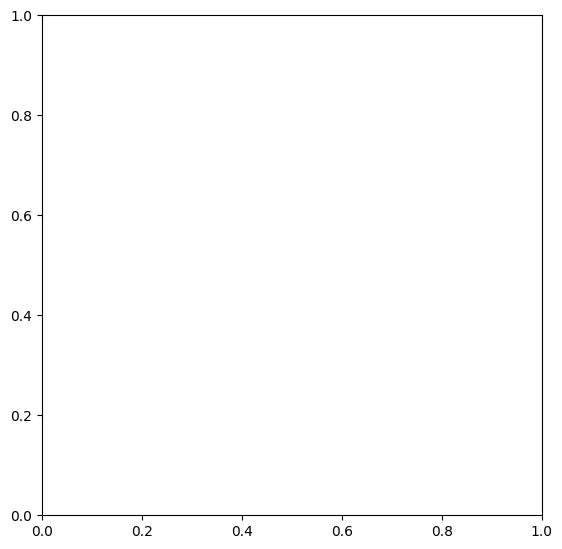

In [19]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])

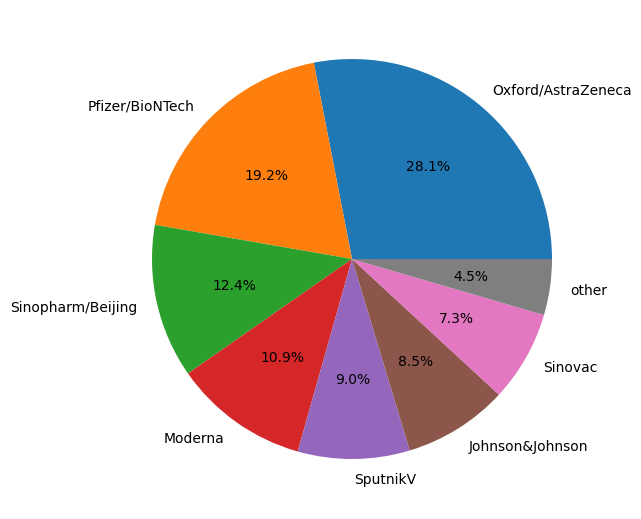

In [20]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

Полный код:

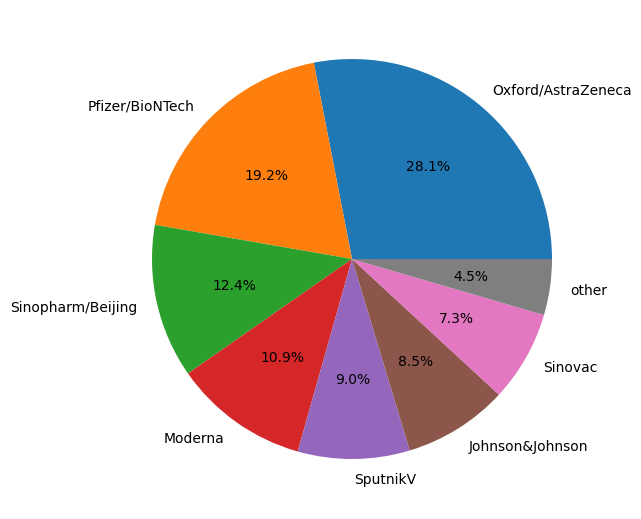

In [21]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

                                              ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

Вы наверное заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нем изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно, вы всегда сможете подсмотреть их в документации):

* axes.set_title() - заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта)
* axes.set_xlabel() - название оси абсцисс
* axes.set_ylabel() - название оси ординат
* axes.set_xticks() - установка отметок на оси абсцисс
* axes.set_yticks() - установка отметок на оси ординат
* axes.xaxis.set_tick_params() - управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах)
* axes.yaxis.set_tick_params()  - управление параметрами отметок на оси ординат
* axes.legend() - отображение легенды
* axes.grid() - установка сетки


Например, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр **label** — название графика, которое будет отображаться на легенде, а также **lw **— ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре **label** метода **plot()**):

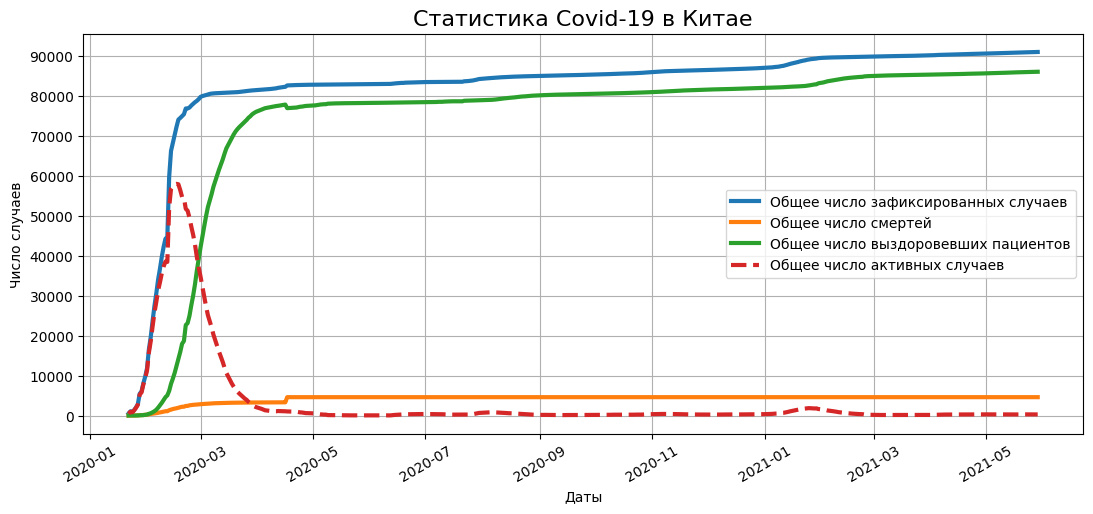

In [22]:
china_data = covid_df[covid_df['country'] == 'China'].sort_values(by='date')
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

На графике наблюдается резкий рост заболеваемости на начальном периоде до середины февраля 2020 года, после чего видно резкое падение числа активных случаев (примерно в этот период власти Китая ввели тотальный локдаун и прекратили транспортное сообщение со всем миром). Далее число активных случаев только падает, а темп прироста числа заболевших снижается. При этом общее число смертей в Китае остаётся практически на одном уровне (около 5 тысяч), уже начиная с мая 2020 года (новые пациенты умирают крайне редко).

Стоит обратить внимание на выделенные чёрным маркером сдвиги в графиках. Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало, а число умерших возросло. Почему так произошло? Произошёл пересчёт числа заболевших? Данные были утеряны или искажены? Если вы в своей практике столкнётесь с такими же противоречиями, вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.

                                                      ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

При использовании библиотеки Matplotlib вовсе не обязательно ограничиваться одной системой координат.

→ Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для этого построим столбчатые диаграммы с помощью метода bar().

                               основные параметры метода bar()

 - x — названия категорий, которые будут располагаться по оси абсцисс;
 - height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
 - width — ширина столбцов диаграммы;
 - color — цвет.
 
Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода **last()** и выбираем ТОП-5 стран с использованием метода **nlargest()**.

При отображении графиков создаём две координатные плоскости **main_axes и insert_axes**, на каждой из них отдельно строим столбчатые диаграммы.

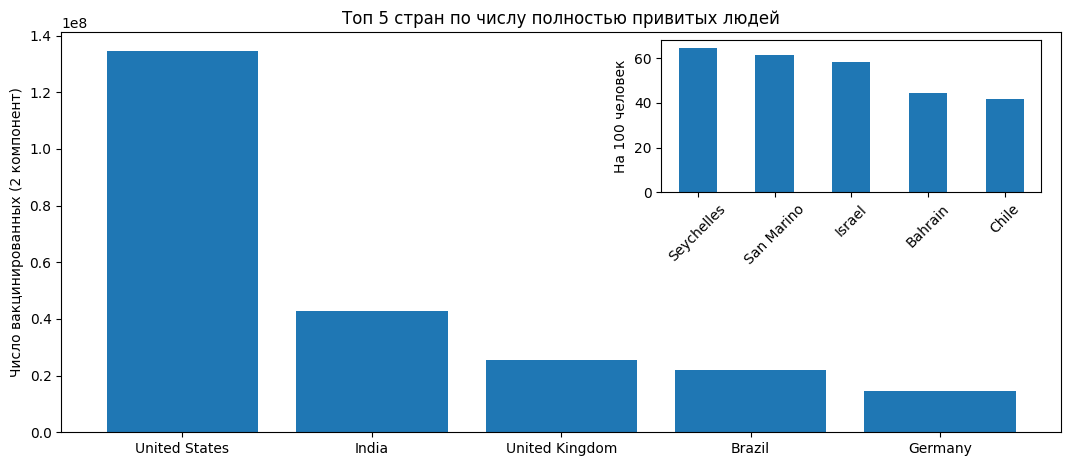

In [23]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(10, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = vacc_country.index,
    height = vacc_country,
    );
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(
    x = vacc_country_per_hundred.index,
    height = vacc_country_per_hundred,
    width=0.5
    );
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Примечание. Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай

                                                                      SUBPLOTS

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция subplots(). Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

                           Основные параметры метода subplots()
  - nrows — число строк;
  - ncols — число столбцов;
  - figsize — общий размер фигуры в дюймах (ширина и высота).
  
Например, следующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3:

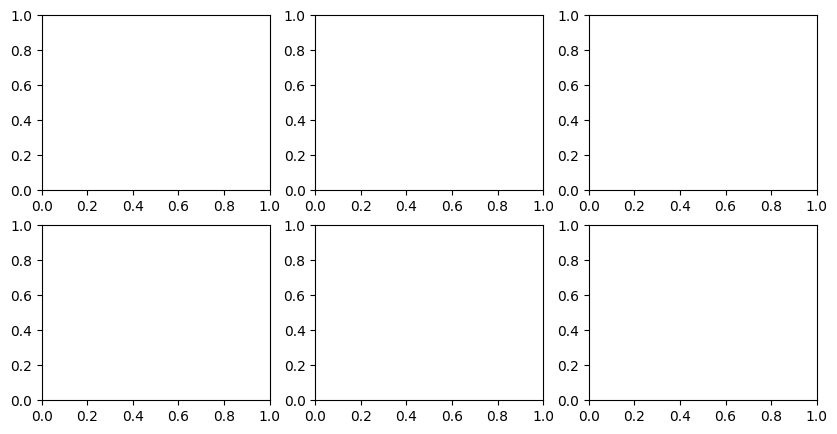

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

Теперь, обладая знаниями о методе subplots(), построим три графика:

Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.</br>
Линейный график изменения ежедневной заболеваемости в стране.</br>
Гистограмму ежедневной заболеваемости в стране.</br>
За построение гистограмм в библиотеке Matplotlib отвечает метод **hist()**.
                                                
                                                Основные параметры метода hist()
  - x — массив чисел, для которого строится гистограмма;
  - bins — число столбцов (корзин);
  - orientation — ориентация гистограммы (по умолчанию 'vertical');
  - color — цвет.      

Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

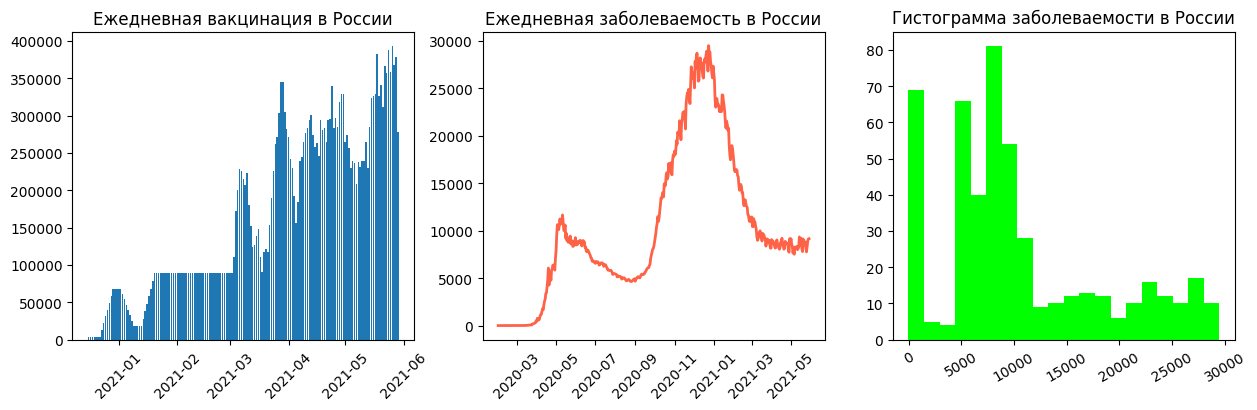

In [26]:
russia_data = covid_df[covid_df['country'] == 'Russia']

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
#столбчатая диаграмма
axes[0].bar(x=russia_data['date'], 
            height=russia_data['daily_vaccinations'],
            label='Число вакцинированных')
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

#линейный график
axes[1].plot(russia_data['date'],
             russia_data['daily_confirmed'],
             label='Число заболевших',
             color='tomato', lw=2)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[2].hist(x=russia_data['daily_confirmed'],
             label=['Число заболевших'], 
             color='lime', bins = 20)
axes[2].set_title('Гистограмма заболеваемости в России');
axes[2].xaxis.set_tick_params(rotation=30)

 Мы рассмотрели лишь основные графики и их настройки в библиотеке Matplotlib. На самом деле библиотека имеет гораздо больший спектр возможностей, на изучение которого не хватит даже целого курса по визуализации, — от добавления текста на диаграмму до визуализации изображений и 3D-графиков.

Если вам вдруг понадобится какая-то особенная функциональность Matplotlib, которую мы не рассматривали, рекомендуем поискать её в документации по библиотеке.

Также стоит отметить, что, помимо объектно-ориентированного подхода в работе с библиотекой Matplotlib, вы можете встретить и модульный подход.

Модульный подход основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей. Например, следующий код строит столбчатую диаграмму: по оси x откладываются элементы списка names (названия групп), а высоту столбцов определяет список values.

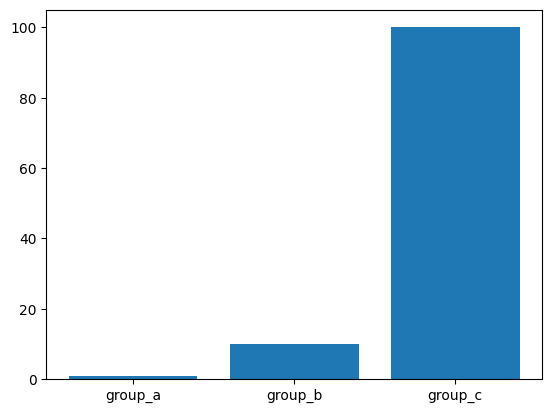

In [27]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

И модульный, и объектно-ориентированный подходы имеют одинаковое право на существование. Ознакомьтесь со статьёй, где используется преимущественно модульный подход, и проведите параллель с изученным материалом.

Задание 5.1

Выберите основные объекты в библиотеке Matplotlib при использовании объектно-ориентированного режима:
  -  Координатные плоскости и заголовки графиков
  - Плоскости и поверхности
  - ***Фигуры (холсты) и координатные плоскости***
  - Выпуклые и невыпуклые фигуры

Задание 5.2

Соотнесите методы объекта axes и графики, которые они строят (при возникновении затруднений обратитесь к документации).

  - axes.plot() - Линейный график </br>
  - axes.box()  Коробчатая диаграмма</br>
  -  axes.scatter() - Диаграмма рассеяния </br>
  - axes.bar() -  Столбчатая диаграмма </br>
  - axes.hist() = Гистограмма

Задание 5.3

Соотнесите методы объекта axes и параметры, которые эти методы регулируют:

   - axes.set_xlabel(), -  Название оси абсцисс
  - axes.set_ylabel() -  Название оси ординат
  - axes.legend() -  Легенда
  - axes.xaxis.set_tick_params() - Параметры отметок на оси абсцисс
  - axes.grid() -  Сетка на графике
  - axes.set_title() -  Название графика

Задание 5.4

По какому параметру отличаются друг от друга представленные ниже графики?


![](https://lms.skillfactory.ru/assets/courseware/v1/3b1a9e43fcac526f0ff80a166e816f7f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-u1-md13_5_9.png)

Ответ

Гистограммы имеют одинаковый диапазон по оси x и отличаются только числом столбцов. За число столбцов в гистограмме отвечает именно параметр ***bins*** .

Задание 5.5
 
Дан код для отрисовки основной системы координат:</br>
fig = plt.figure(figsize=(13, 4))</br>
main_axes = fig.add_axes([0, 0, 1, 1])</br>
Выберите правильный набор параметров, позволяющих разместить вспомогательную ось так, как показано на заготовке графика ниже.
![](https://lms.skillfactory.ru/assets/courseware/v1/853c7b82600bd95a35973fdbfd919fc8/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-u1-md13_5_10.png)


  - Подсказка (1 из 2): Из размещения главной и вспомогательной систем координат ясно, что вспомогательная смещена на 20 % вверх и на 20 % влево относительно главной.
  - Подсказка (2 из 2): Ширина и высота вспомогательной системы координат занимает 60 % от ширины и высоты главной.

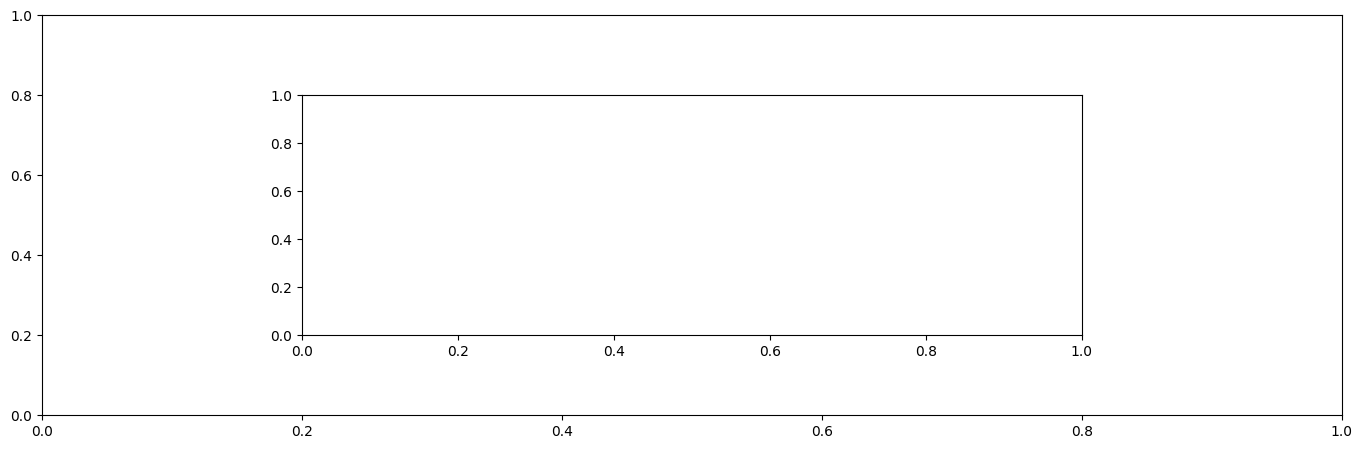

In [30]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

Задание 5.6

Выберите вариант кода, который позволит построить приведённый ниже график (посмотрите в документации параметры объекта figure, которые позволяют раскрашивать части фигуры).

![](https://lms.skillfactory.ru/assets/courseware/v1/e055927ad84c9886b43548a99c705e37/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-u1-md13_5_11.png)


  - Подсказка (1 из 2): Чтобы построить такой график, необходимо сгруппировать данные по датам и вычислить суммарное ежедневно фиксируемое количество вакцинированных людей по всем странам.
  - Подсказка (2 из 2): Для раскрашивания обрамления фигуры необходимо выставить значение параметра facecolor на 'lightgreen' (светло-зелёный цвет). Параметр edgecolor отвечает за расцветку внутреннего графика.

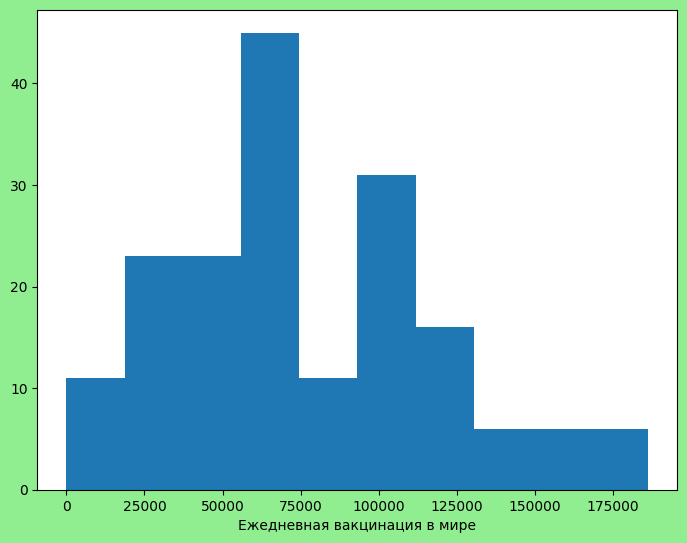

In [31]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].mean())
axes.set_xlabel('Ежедневная вакцинация в мире');

Задание 5.7
 
Какое название лучше всего подойдёт графику, который строит код ниже?

v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v)

Подсказка (1 из 1): Данные группируются по признаку страны, и рассчитывается последнее значение общего числа сделанных прививок в каждой стране. Далее выбираются пять стран, где значение этого показателя наибольшее. На основе этих данных строится столбчатая диаграмма.

ответ ТОП-5 стран по общему числу сделанных прививок

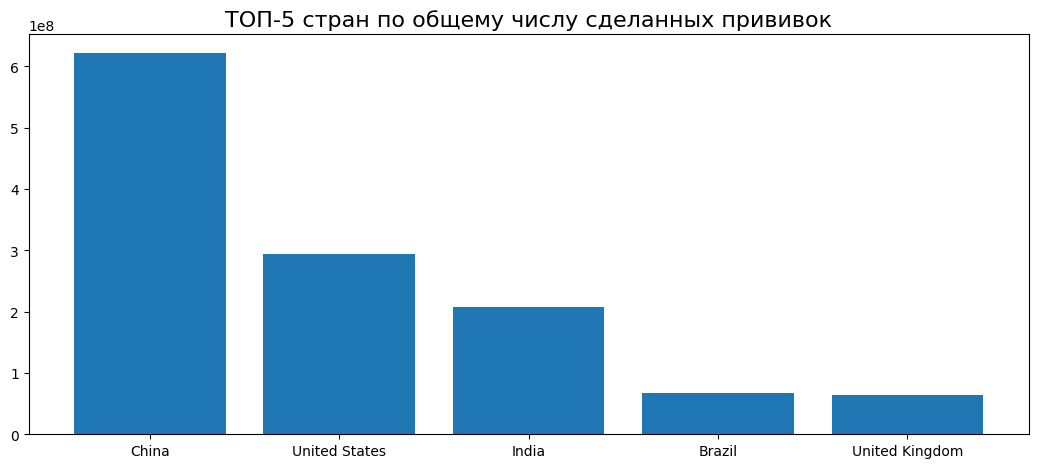

In [43]:
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v, )
axes.set_title('ТОП-5 стран по общему числу сделанных прививок', fontsize=16);

Задание 5.8

Подумайте (или посмотрите в документации), по каким индексам надо обратиться к списку осей axes, полученному с помощью метода subplots(), чтобы построить такой график:

![](https://lms.skillfactory.ru/assets/courseware/v1/1550e6877a84052fc7ede81281fd8430/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-u1-md13_5_12.png)

верно **axes[2][1]** 

Подсказка: Метод subplots() возвращает фигуру и список из координатных плоскостей. Если число строк или столбцов больше 1, то возвращается вложенный список. По первому индексу происходит обращение к строкам таблицы, по второму индексу — к столбцам.